In [1]:
#https://www.kaggle.com/gauthamp10/google-playstore-apps?select=Google-Playstore-Full.csv

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import datetime
import math

In [3]:
filepath='C:\\Users\\Subin\\Desktop\\Data\\'
df = pd.read_csv(filepath+'Google-Playstore.csv')

In [4]:
df.shape

(603047, 23)

# Data Preparation

## Renaming the dataframe for convinience 

In [5]:
df=df.drop(['App Id', 'Installs', 'Minimum Installs', 'Developer Id', 'Developer Website','Developer Email', 'Privacy Policy'], axis=1)
df=df.rename(columns={"Maximum Installs": "Installs"})
df.head()

,App Name,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,foodpanda - Local Food & Grocery Delivery,Food & Drink,4.4,1258493.0,48828081,True,0.00,USD,21M,4.3 and up,"Nov 19, 2013",2020-07-07 00:14:05,Everyone,False,False,False
1,"Tripadvisor Hotel, Flight & Restaurant Bookings",Travel & Local,4.4,1360172.0,371284181,True,0.00,USD,Varies with device,Varies with device,"Jul 12, 2010",2020-07-02 20:10:48,Everyone,True,False,False
2,Safeway Delivery & Pick Up,Shopping,4.2,5532.0,816102,True,0.00,USD,12M,7.0 and up,"Sep 5, 2013",2020-07-16 23:21:50,Everyone,False,False,False
3,My CookBook Ad-Free,Food & Drink,4.7,2531.0,16171,False,5.99,USD,Varies with device,Varies with device,"Sep 25, 2011",2020-07-07 12:41:28,Everyone,False,False,False
4,Talabat: Food & Grocery Delivery,Food & Drink,4.4,197649.0,9218590,True,0.00,USD,Varies with device,Varies with device,"Jan 19, 2012",2020-07-15 19:21:16,Mature 17+,True,False,False


In [6]:
df.dtypes

App Name             object
Category             object
Rating              float64
Rating Count        float64
Installs              int64
Free                   bool
Price               float64
Currency             object
Size                 object
Minimum Android      object
Released             object
Last Updated         object
Content Rating       object
Ad Supported           bool
In App Purchases       bool
Editors Choice         bool
dtype: object

## Dealing with NA values

In [7]:
df.isnull().values.any()

True

In [8]:
# There are null values in the dataset.
# Hence, we drop the rows with NA values 
df=df.dropna(axis=0)

In [9]:
df.isnull().values.any()

False

## Dealing with improper values

In [10]:
df = df[df['Installs'] > 0]
df = df[df['Rating'] > 0]

In [11]:
df.shape

(417952, 16)

## Transforming 'Last Updated' and 'Released' Column to datetime format

In [12]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Released']=pd.to_datetime(df['Released'])

In [13]:
# Converting the Size columns
df['Size']=df['Size'].str.replace('Varies with device','0')
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].str.replace(',','')

df['Size']=df['Size'].apply(float)

# Analysis

### Number of installations and price

Text(0.5, 0, 'Free Apps')

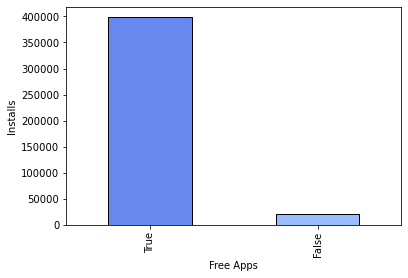

In [14]:
c=sns.color_palette(palette='coolwarm')
ax=df['Free'].value_counts().plot.bar(color=c, edgecolor='k')

ax.set_ylabel('Installs')
ax.set_xlabel('Free Apps')


(10.0, 10000000.0)

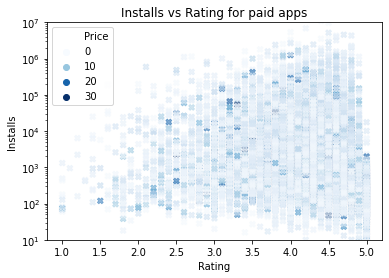

In [15]:
data=df[df['Installs']<100000000]
data=data[data['Price']<25]
data=data[data['Free'] == False]
# Considering only paid apps

ax=sns.scatterplot(data=data, x='Rating', y='Installs', edgecolor=None, alpha=0.5, hue='Price', marker='X', palette='Blues')
ax.set_title('Installs vs Rating for paid apps')
ax.set_yscale('log')
ax.set_ylim(1e1, 1e7)

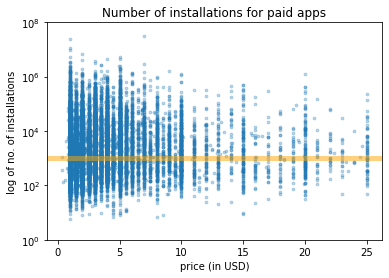

In [16]:
fig=sns.scatterplot(data=data, x='Price', y='Installs', edgecolor=None, alpha=0.3, marker='.')
ax=plt.gca()
ax.set_yscale('log')
plt.ylim(1e0, 1e8)
ax.set_title('Number of installations for paid apps')
ax.set_ylabel('log of no. of installations')
ax.set_xlabel('price (in USD)')
fig.axhline(1e3, c='#ffa500', alpha=0.5, linewidth=5)

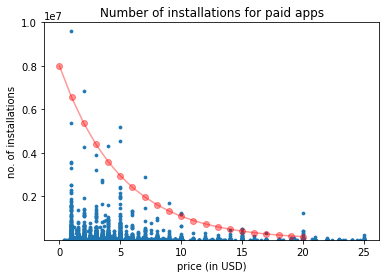

In [17]:
fig=sns.scatterplot(data=data, x='Price', y='Installs', edgecolor=None, alpha=1, marker='.')
ax=plt.gca()
plt.ylim(1e0, 1e7)

ax.set_title('Number of installations for paid apps')
ax.set_ylabel('no. of installations')
ax.set_xlabel('price (in USD)')

A, a = 8000000, 0.2
x = np.arange(21)
y = A*np.exp(-a*x)
ax.plot(x, y, marker='o', color='r', alpha=0.4)

Apps with high installations are almost all free. Investigating paid apps, we find that the number of install of apps exponentially decreases with price, this is supported by the fact that the log graph is uniformly distributed.  

### In app purchases and ad support 

Text(0.5, 0, 'In App Purchases or Ad supported')

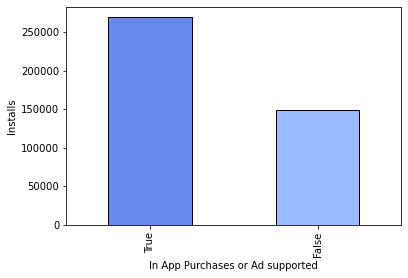

In [18]:
c=sns.color_palette(palette='coolwarm')
x=df['In App Purchases'] | df['Ad Supported']
ax=x.value_counts().plot.bar(color=c, edgecolor='k')

ax.set_ylabel('Installs')
ax.set_xlabel('In App Purchases or Ad supported')

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

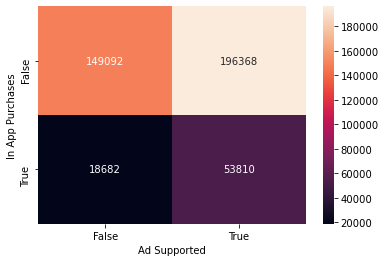

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax=sns.heatmap(confusion_matrix(df['In App Purchases'], df['Ad Supported']), annot=True, fmt='0')
ax.set_ylabel('In App Purchases')
ax.set_xlabel('Ad Supported')
ax.set_xticklabels([False, True])
ax.set_yticklabels([False, True])

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

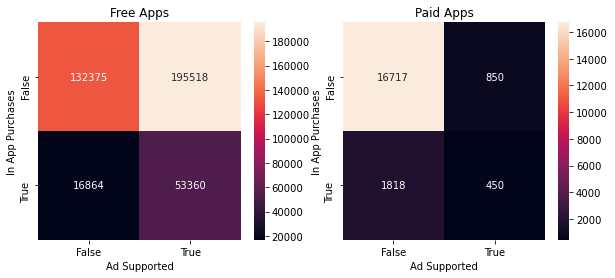

In [20]:
freeapps=df[df['Free']==True]
paidapps=df[df['Free']==False]

fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.heatmap(confusion_matrix(freeapps['In App Purchases'], freeapps['Ad Supported']), annot=True, fmt='0', ax=axs[0])
axs[0].set_ylabel('In App Purchases')
axs[0].set_xlabel('Ad Supported')
axs[0].set_title('Free Apps')
axs[0].set_xticklabels([False, True])
axs[0].set_yticklabels([False, True])

axs[1]=sns.heatmap(confusion_matrix(paidapps['In App Purchases'], paidapps['Ad Supported']), annot=True, fmt='0', ax=axs[1])
axs[1].set_ylabel('In App Purchases')
axs[1].set_xlabel('Ad Supported')
axs[1].set_title('Paid Apps')
axs[1].set_xticklabels([False, True])
axs[1].set_yticklabels([False, True])

For the free apps, we find that most apps are Ad Supported but without In App Purchases. This makes sense because eventhough Apps are labeled free, App companies generate most of their revenues through Ads. 

For the paid apps, we find that most apps do not contain In App Purchases or is Ad supported. This implies that most paid apps mainly generate their revenues through customer purchase.

### Editors Choice

Text(0.5, 0, 'In App Purchases or Ad supported')

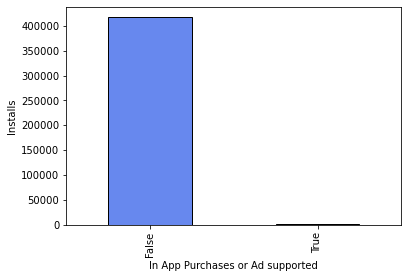

In [21]:
c=sns.color_palette(palette='coolwarm')
x=df['Editors Choice']
ax=x.value_counts().plot.bar(color=c, edgecolor='k')

ax.set_ylabel('Installs')
ax.set_xlabel('In App Purchases or Ad supported')

(10.0, 1000000000.0)

C:\Users\Subin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


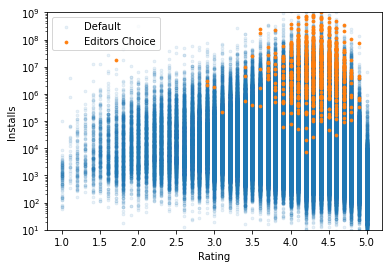

In [22]:
ax=sns.scatterplot(data=df[df['Editors Choice']==False], x='Rating', y='Installs', edgecolor=None, marker='.', alpha=0.1)
sns.scatterplot(data=df[df['Editors Choice']==True], x='Rating', y='Installs', edgecolor=None, marker='.', ax=ax)

plt.legend(labels=['Default', 'Editors Choice'])
ax.set_yscale('log')
ax.set_ylim(1e1, 1e9)


The Editors usually choose Apps with high ratings and high installations

Text(0.5, 0, 'Paid')

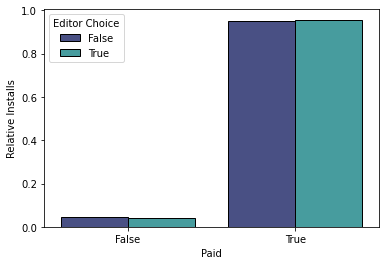

In [23]:
x=df['Free'].value_counts()
x=x/x.sum()

y=df['Free'][df['Editors Choice']==True].value_counts()
y=y/y.sum()

data=pd.DataFrame(data=(x.append(y)), index=None)
data.insert(1, 'Editor Choice', [False, False, True, True])
data.insert(0, 'ID', [True, False, True, False])

ax=sns.barplot(x='ID',y='Free', data=data, hue='Editor Choice', palette="mako", edgecolor='k')
ax.set_ylabel('Relative Installs')
ax.set_xlabel('Paid')


Text(0.5, 1.0, 'Editors Choice over categories')

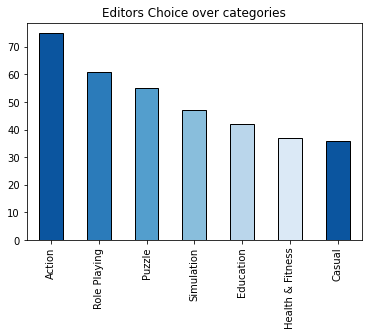

In [24]:
color=sns.color_palette("Blues_r")
category=df['Category'][df['Editors Choice']==True].value_counts()
category=category[:7]
ax=category.plot.bar(color=color, edgecolor='k')
ax.set_title("Editors Choice over categories")

Most editor choices are games hence most users that use editors choice apps are gamers 

### Released Date and Last Updated Date

Text(0.5, 1.0, 'Apps Released Date')

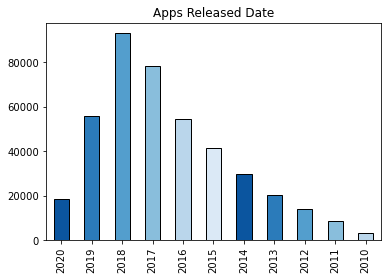

In [25]:
released_year=pd.DatetimeIndex(df['Released']).year
#released_year = released_year.sort_values('Released')
released_year.value_counts().sort_index(ascending=False).plot.bar(color=color, edgecolor='k')
ax=plt.gca()
ax.set_title('Apps Released Date')


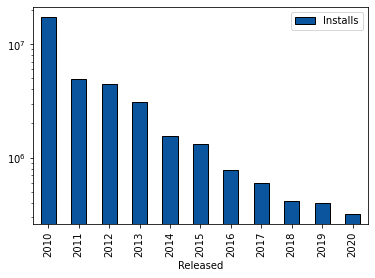

In [26]:
data=pd.DataFrame({'Installs':df['Installs'], 'Released':np.array(released_year)})
ax=data.groupby(['Released']).mean().plot.bar(color=color, edgecolor='k')
ax.set_yscale('log')

Text(0.5, 1.0, 'Apps Last Updated Date')

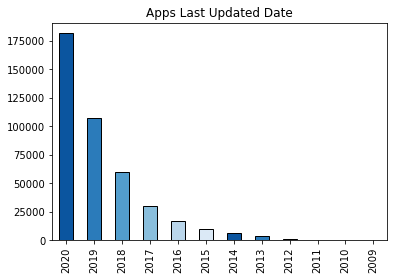

In [27]:
updated_year=pd.DatetimeIndex(df['Last Updated']).year
updated_year.value_counts().plot.bar(color=color, edgecolor='k')
ax=plt.gca()
ax.set_title('Apps Last Updated Date')

Text(0.5, 0, 'Year')

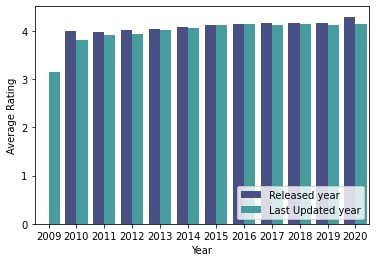

In [28]:
data1=pd.DataFrame({'Rating':df['Rating'], 'Released':np.array(released_year)})
data1=data1.groupby(['Released']).mean()
data1['id']=0

data2=pd.DataFrame({'Rating':df['Rating'], 'Last Updated':np.array(updated_year)})
data2=data2.groupby(['Last Updated']).mean()
data2['id']=1

x=data1.append(data2)
x=x.reset_index()

ax=sns.barplot(data=x, x='index', y='Rating', hue='id', palette='mako')
L=ax.legend(loc=4)
L.get_texts()[0].set_text('Released year')
L.get_texts()[1].set_text('Last Updated year')

ax.set_ylabel('Average Rating')
ax.set_xlabel('Year')


Text(0.5, 0, 'Year')

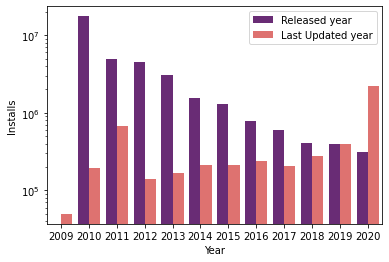

In [29]:
data1=pd.DataFrame({'Installs':df['Installs'], 'Released':np.array(released_year)})
data1=data1.groupby(['Released']).mean()
data1['id']=0

data2=pd.DataFrame({'Installs':df['Installs'], 'Last Updated':np.array(updated_year)})
data2=data2.groupby(['Last Updated']).mean()
data2['id']=1

x=data1.append(data2)
x=x.reset_index()

ax=sns.barplot(data=x, x='index', y='Installs', hue='id', palette='magma')
ax.set_yscale('log')

L=ax.legend(loc=1)
L.get_texts()[0].set_text('Released year')
L.get_texts()[1].set_text('Last Updated year')

ax.set_xlabel('Year')

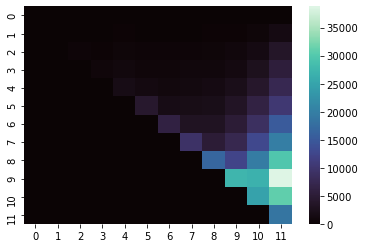

In [30]:
sns.heatmap(confusion_matrix(released_year, updated_year), cmap='mako')

### Category

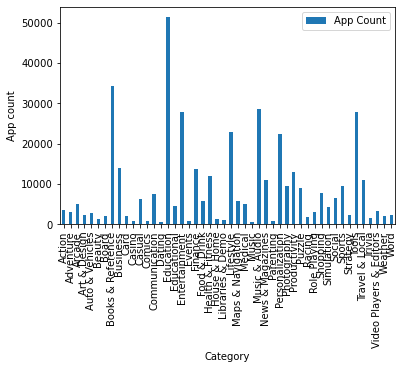

In [31]:
AppCount = df['App Name'].groupby(df['Category']).count()
df_1 = pd.DataFrame(AppCount)
df_1.rename(columns={"App Name": "App Count"},inplace=True)
df_1.plot(kind='bar',stacked=True)
plt.ylabel("App count")
plt.show()

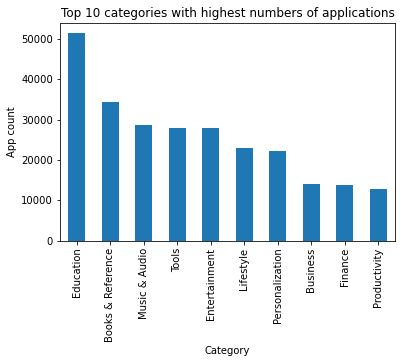

In [32]:
#Top ten categories with highest number of app count.
#Highest number of apps under category Education, least number of apps in Music category
topten = AppCount.nlargest(10)
topten.plot(kind="bar")
plt.title("Top 10 categories with highest numbers of applications")
plt.ylabel("App count")
plt.show()

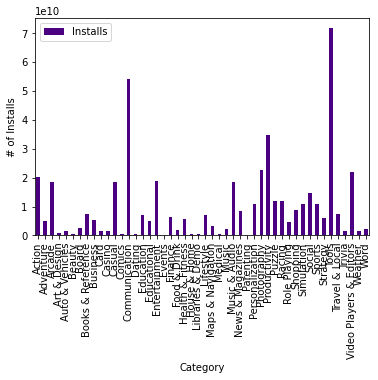

In [33]:
#Grouping data by categoring and adding the number of installations in each category.
installs = df.groupby('Category')['Installs'].sum()
#Bar graph showing installs vs category of apps
numOfInstalls = pd.DataFrame(installs)
numOfInstalls.plot(kind='bar',stacked=True, color="#4B0082")
plt.ylabel("# of Installs")
plt.show()

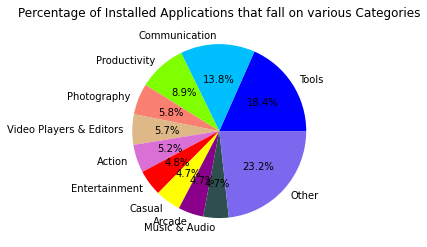

In [34]:
#Category vs installation in a pie chart for top 10 categories, and the rest are represented as others.
values = installs.nlargest(10)
other = installs.nsmallest(30).sum()
others= pd.Series([other], index=["Other"])
fvalues = values.append(others)
labels = fvalues.index
colors = ["#0000FF", "#00BFFF", "#7FFF00", "#FA8072", "#DEB887", "#DA70D6", "red", "yellow", "#8B008B", "#2F4F4F", "#7B68EE"]
plt.pie(fvalues, labels=labels,colors=colors,autopct='%1.1f%%',startangle=0)
plt.title("Percentage of Installed Applications that fall on various Categories")
plt.show()

### Price Vs Category

In [35]:
#Apps in which categories are usually priced and apps in which are free. What is the range of differences between the pricing.

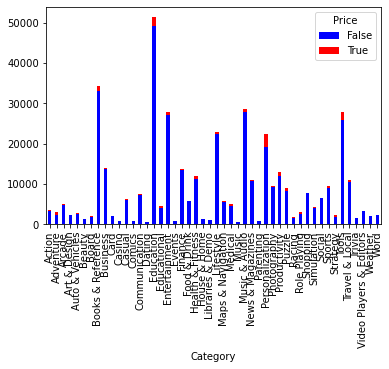

In [36]:
test = df.groupby(['Category',df['Price']>0], as_index = False).size()
test.unstack().plot(kind='bar', stacked=True, color=["blue", "red"])

### Rating Count

Rating vs rating count & Released vs rating count vs category
How would ratings relate to rating counts? Do greater value for rating count has higher rating??

In [37]:
group1 = df['Rating'].groupby(df['Rating Count']>100000000)
print(group1.mean())
group2 = df['Rating'].groupby((df['Rating Count']>1000000) & (df['Rating Count']<100000000))
print(group2.mean())
group3 = df['Rating'].groupby((df['Rating Count']>100000) & (df['Rating Count']<1000000))
print(group3.mean())
group4 = df['Rating'].groupby((df['Rating Count']>10000) & (df['Rating Count']<100000))
print(group4.mean())
group5 = df['Rating'].groupby((df['Rating Count']>1000) & (df['Rating Count']<10000))
print(group5.mean())
group6 = df['Rating'].groupby((df['Rating Count']>100) & (df['Rating Count']<1000))
print(group6.mean())
group7 = df['Rating'].groupby((df['Rating Count']>0) & (df['Rating Count']<100))
print(group7.mean())

Rating Count
False    4.133303
True     4.400000
Name: Rating, dtype: float64
Rating Count
False    4.132964
True     4.353023
Name: Rating, dtype: float64
Rating Count
False    4.131351
True     4.298993
Name: Rating, dtype: float64
Rating Count
False    4.129473
True     4.209315
Name: Rating, dtype: float64
Rating Count
False    4.135093
True     4.121952
Name: Rating, dtype: float64
Rating Count
False    4.149518
True     4.092911
Name: Rating, dtype: float64
Rating Count
False    4.118436
True     4.147330
Name: Rating, dtype: float64


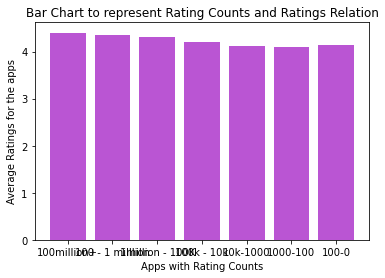

In [38]:
index = [1,2,3,4,5,6,7]
values= [group1.mean()[True], group2.mean()[True], group3.mean()[True], group4.mean()[True], group5.mean()[True], group6.mean()[True],group7.mean()[True]]
plt.bar(index,values,color='#BA55D3')
plt.xticks(index,['100million+','100 - 1 milllion','1million - 100K','100k - 10k', '10k-1000', '1000-100', '100-0'])
plt.xlabel("Apps with Rating Counts")
plt.ylabel("Average Ratings for the apps")
plt.title("Bar Chart to represent Rating Counts and Ratings Relation")
plt.show()

### App Size and Rating

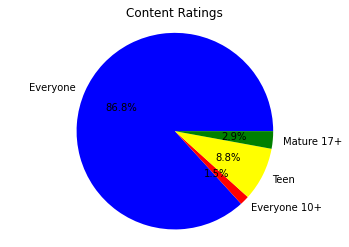

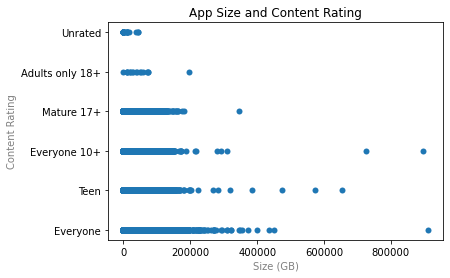

Sizes by content rating:

Everyone
Average Size: 14853.685174780567
Standard deviation: 22505.504809385795

Everyone 10+
Average Size: 32877.90743295031
Standard deviation: 35266.03829727774

Teen
Average Size: 24285.560092921973
Standard deviation: 30341.022773108933

Mature 17+
Average Size: 17675.725495818515
Standard deviation: 25281.34137425203

Adults only 18+:
Average Size: 46118.029411764706
Standard deviation: 45171.316407812454

Unrated
Average Size: 8299.925000000001
Standard deviation: 13861.111265515472


In [39]:
#Filter out sizes of 0
rs = df[df["Size"] > 0]

#Pie chart to represent the number of apps with in app purchases
labels = ["Everyone", "Everyone 10+", "Teen", "Mature 17+"]
colors = ['blue','red','yellow','green']
plt.pie([937670, 16717, 95273, 31104],labels=labels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Content Ratings")
plt.show()

#Scatter plot for content rating and app size
plt.ylabel('Content Rating', color='gray')
plt.xlabel('Size (GB)',color='gray')
plt.title("App Size and Content Rating")
plt.scatter(rs["Size"], rs["Content Rating"], linewidth= 0.0001)
plt.show()

#Averages and standard deviations by rating

print("Sizes by content rating:")

rs2 = rs[rs["Content Rating"] == "Everyone"]
print("\nEveryone")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

rs2 = rs[rs["Content Rating"] == "Everyone 10+"]
print("\nEveryone 10+")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

rs2 = rs[rs["Content Rating"] == "Teen"]
print("\nTeen")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

rs2 = rs[rs["Content Rating"] == "Mature 17+"]
print("\nMature 17+")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

rs2 = rs[rs["Content Rating"] == "Adults only 18+"]
print("\nAdults only 18+:")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

rs2 = rs[rs["Content Rating"] == "Unrated"]
print("\nUnrated")
print("Average Size:", rs2["Size"].mean())
print("Standard deviation:", rs2["Size"].std())

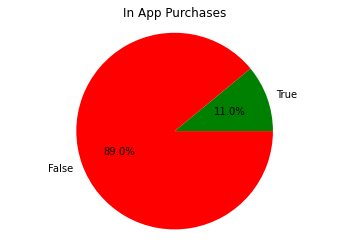

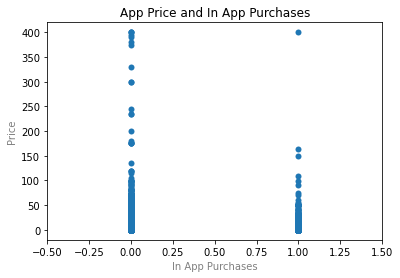

In App Purchases (True)
Average price (USD): $ 0.146576257194885
Standard deviation: 2.2810806677364517

In App Purchases (False)
Average price (USD): $ 0.23194367882133618
Standard deviation: 2.884934022152318


In [40]:
usd = df[df["Currency"]=="USD"]

#Divisions for apps with in app purchases and apps without
tp = usd[usd["In App Purchases"]==True]
fp = usd[usd["In App Purchases"]==False]

#Pie chart to represent the number of apps with in app purchases
labels = ['True','False']
colors = ['green','red']
plt.pie([118056, 957080],labels=labels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.title("In App Purchases")
plt.show()

#Scatter plot for apps with/without in app purchases
plt.xlabel('In App Purchases', color='gray')
plt.ylabel('Price',color='gray')
plt.scatter(usd['In App Purchases'], usd['Price'], linewidth= 0.0001)
plt.xlim(-0.5,1.5)
plt.title("App Price and In App Purchases")
plt.show()

#Averages and standard deviations
print("In App Purchases (True)")
print("Average price (USD): $",tp['Price'].mean())
print("Standard deviation:",tp['Price'].std())
print("\nIn App Purchases (False)")
print("Average price (USD): $",fp['Price'].mean())
print("Standard deviation:",fp['Price'].std())

### Rating vs Content Rating

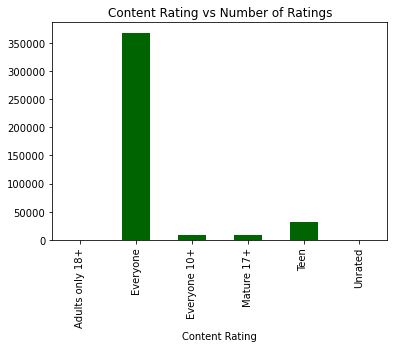

In [41]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(title = "Content Rating vs Number of Ratings", color="darkgreen")

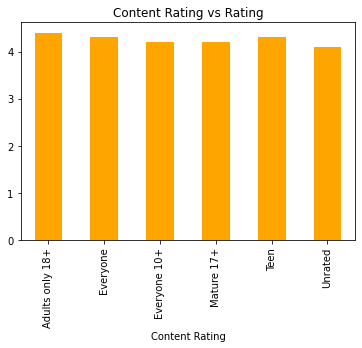

In [42]:
df.groupby(['Content Rating'])['Rating'].median().plot.bar(title = 'Content Rating vs Rating', color="orange")

### Category vs Mean Distribution

Text(0.5, 1.0, 'Mean Rating Per Category')

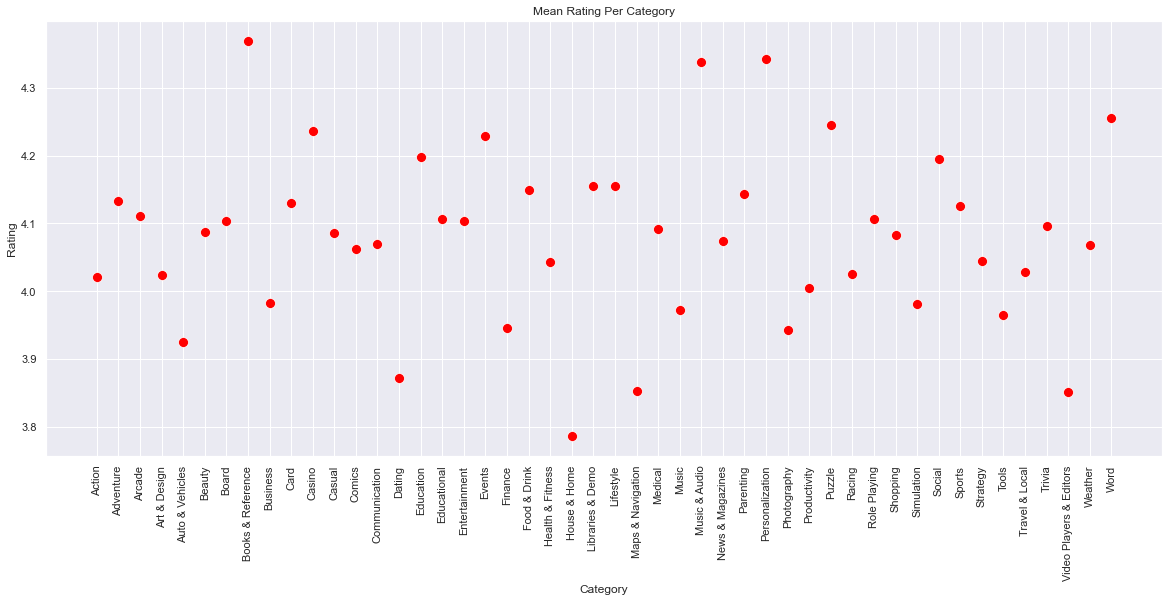

In [43]:
sns.set(rc={'figure.figsize':(20, 8)})

d = df.groupby('Category')['Rating'].mean().reset_index()
ax = sns.scatterplot(data= d, x= d.Category, y = d.Rating, s = 100, color = 'red')
plt.xticks(rotation=90)
ax.set_title('Mean Rating Per Category')


### Ad Supported and Free

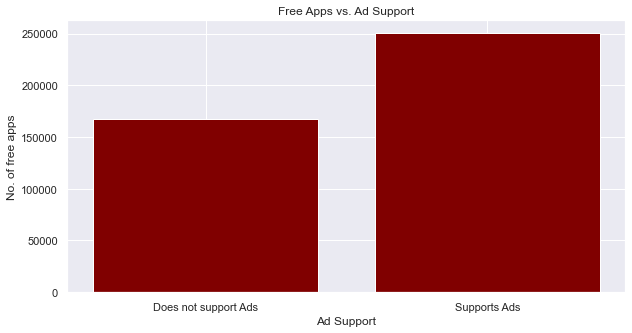

In [44]:
df2 = df[['Ad Supported', 'Free']]
#print(df2)

ad_supported = df2.groupby('Ad Supported')
r2 = ad_supported.count()
r2.reset_index(inplace=True)
#print(r2)


data = {'Does not support Ads':0, 'Supports Ads':0}
ad = list(data.keys()) 
values = list(data.values())

   
fig = plt.figure(figsize = (10, 5)) 


free_or_not = r2['Free']
plt.bar(ad, free_or_not, color ='maroon')
  
plt.xlabel("Ad Support") 
plt.ylabel("No. of free apps") 
plt.title("Free Apps vs. Ad Support") 
plt.show()

### In App Purchases and Category

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

                   Category  In App Purchases
27                    Music               555
14                   Dating               645
18                   Events               798
10                   Casino               802
12                   Comics               829
30                Parenting               956
23         Libraries & Demo              1035
22             House & Home              1375
5                    Beauty              1416
44                   Trivia              1667
35                   Racing              1718
6                     Board              2052
46                  Weather              2132
9                      Card              2151
41                 Strategy              2291
47                     Word              2299
3              Art & Design              2445
4           Auto & Vehicles              2736
36             Role Playing              3026
1                 Adventure              3041
45  Video Players & Editors       

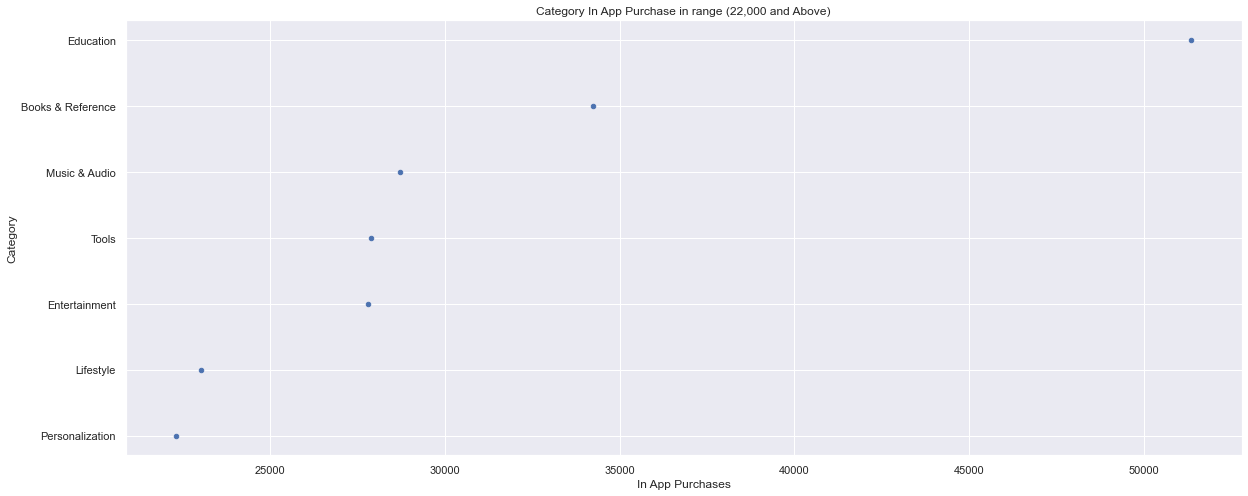

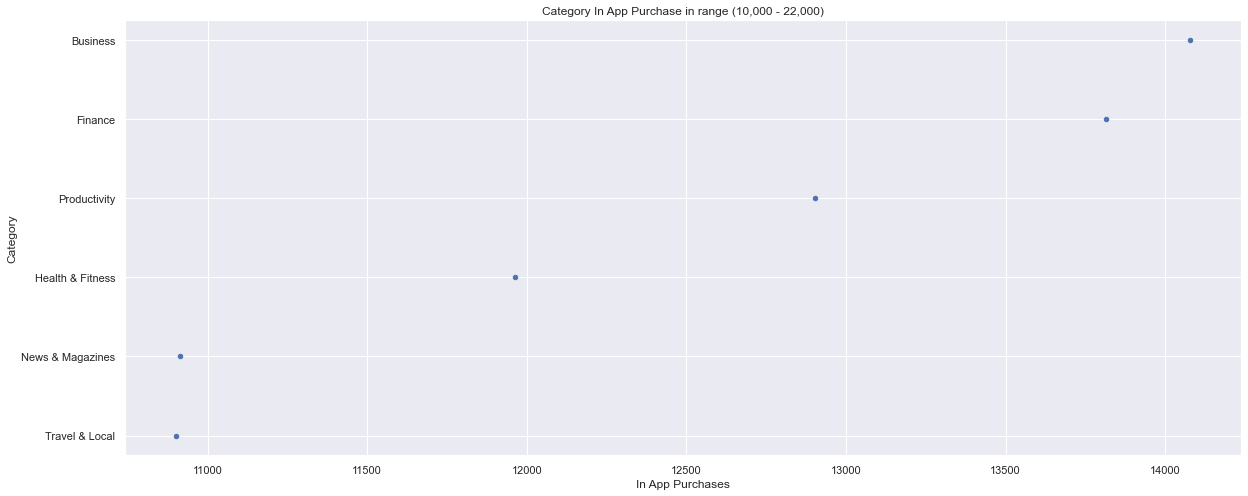

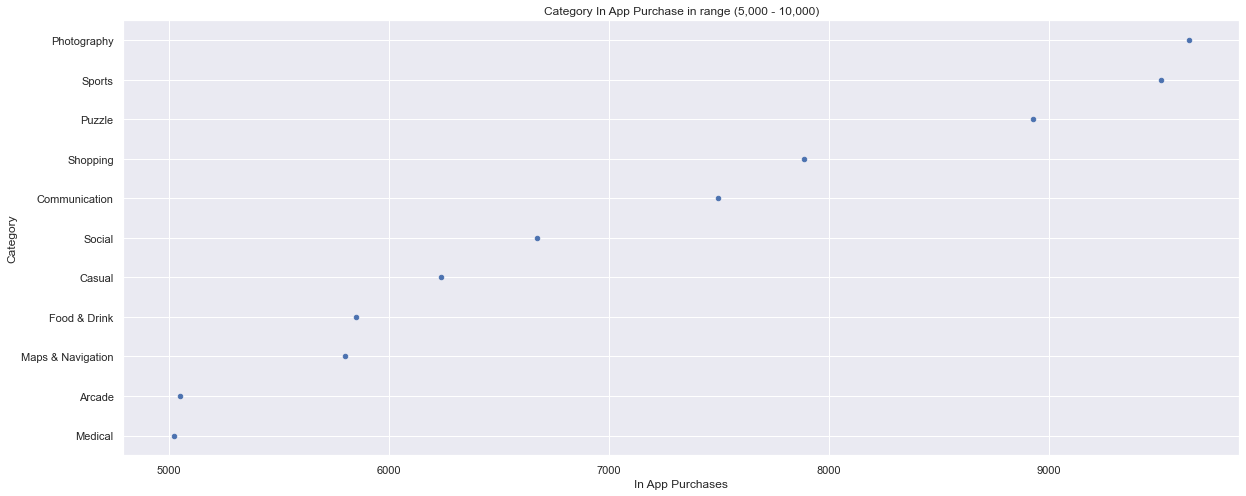

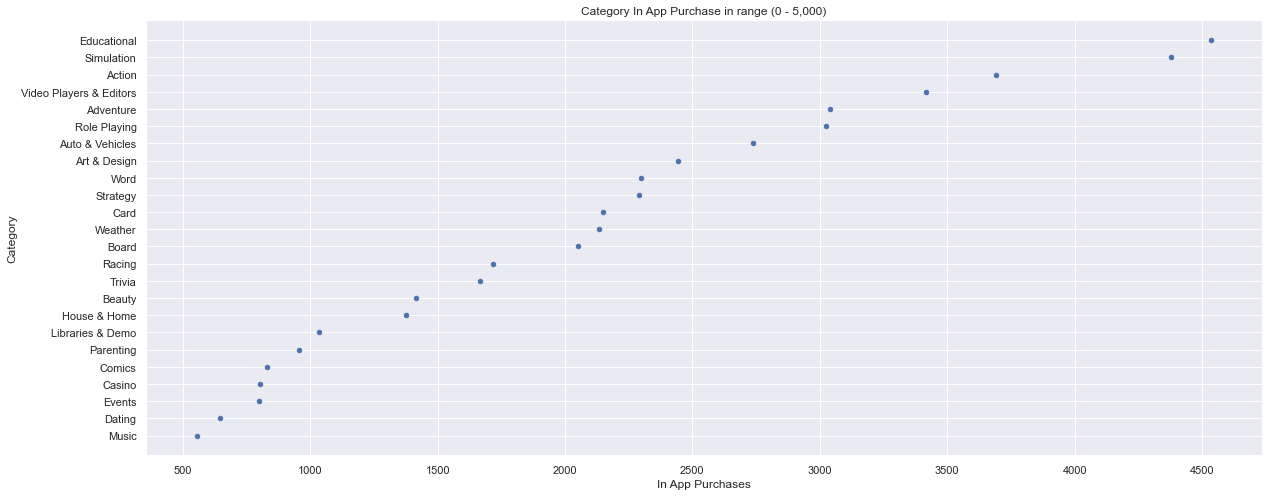

In [45]:
df3 = df[['In App Purchases', 'Category']]
#print(df3)

inApp = df3.groupby('Category').count()
inApp.reset_index(inplace=True)
inApp.sort_values('In App Purchases', inplace=True)

first = inApp[inApp["In App Purchases"] >= 22000]

second = inApp[inApp["In App Purchases"] >= 10000]
second = second[second["In App Purchases"] < 22000]

third = inApp[inApp["In App Purchases"] >= 5000]
third = third[third["In App Purchases"] < 10000]

fourth = inApp[inApp["In App Purchases"] >= 0]
fourth = fourth[fourth["In App Purchases"] < 5000]


first.plot.scatter(x='In App Purchases', y='Category', title= "Category In App Purchase in range (22,000 and Above)");
second.plot.scatter(x='In App Purchases', y='Category', title= "Category In App Purchase in range (10,000 - 22,000)");
third.plot.scatter(x='In App Purchases', y='Category', title= "Category In App Purchase in range (5,000 - 10,000)");
fourth.plot.scatter(x='In App Purchases', y='Category', title= "Category In App Purchase in range (0 - 5,000)");


print(inApp)